In [1]:
from model import AnomalyAE
from PIL import Image
import torch
from torchvision.transforms import Compose, Grayscale, ToTensor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = AnomalyAE()
model.load_state_dict(torch.load('./model/best_model_25_loss=-2.1490116600327552e-06.pth'))
model.eval()
model = model.to('cuda')
imgpath = "./image/0045.PNG"
img = Image.open(imgpath).convert('L')
transform = Compose([Grayscale(), ToTensor()])
img = transform(img)
img = img.to('cuda')
img = img.unsqueeze(0)
y = model(img)
residual = torch.abs(img[0][0]-y[0][0])

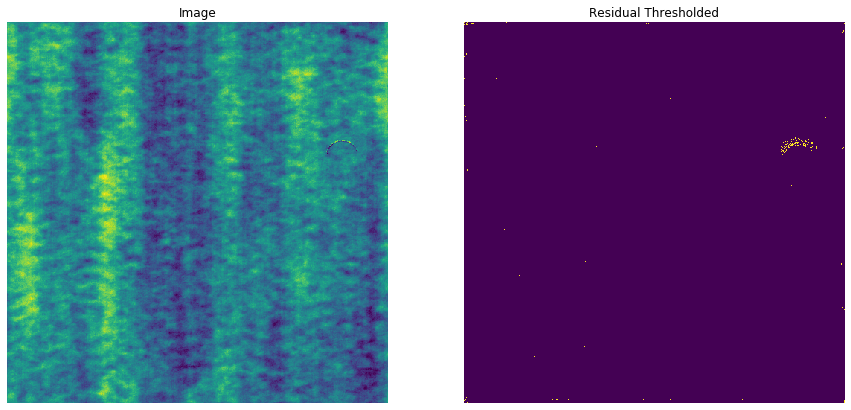

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(121);
plt.imshow(img.detach().cpu().numpy()[0][0]);
plt.title('Image')
plt.axis('off');
plt.subplot(122);
plt.imshow(residual.detach().cpu().numpy()>0.007);
plt.title('Residual Thresholded')
plt.axis('off');
plt.savefig('sample_detection.png', bbox_inches='tight')

(array([2.53169e+05, 8.59600e+03, 2.75000e+02, 7.10000e+01, 2.00000e+01,
        4.00000e+00, 6.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([0.        , 0.00308152, 0.00616304, 0.00924456, 0.01232609,
        0.01540761, 0.01848913, 0.02157065, 0.02465217, 0.02773369,
        0.03081521], dtype=float32),
 <a list of 10 Patch objects>)

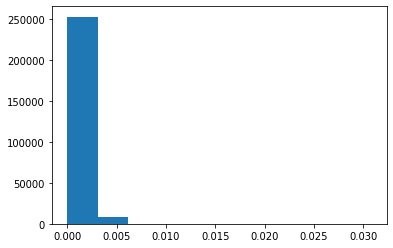

In [4]:
plt.hist(residual.detach().cpu().numpy().ravel())